In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,classification_report,accuracy_score,confusion_matrix,recall_score,f1_score ,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  GaussianNB
from sklearn.preprocessing import LabelEncoder,StandardScaler
import numpy as np

In [3]:
msiing_values=["N/a",'?','na',np.nan]

In [4]:
df=pd.read_csv('hepatitis.csv',header=None ,na_values=msiing_values)

In [5]:
df.columns=['CLASS','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']

In [6]:
df

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [7]:
df.isnull().sum()

CLASS               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

In [8]:
#cd=df.dropna()

### Cleaning the data

In [9]:
def clean(data):
    for col in data:
        df[col].fillna(df[col].mean(), inplace=True)
        
clean(df)        

In [10]:
df

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.000000,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,61.852273,1
1,2,50,1,1.000000,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,61.852273,1
2,2,78,1,2.000000,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,61.852273,1
3,2,31,1,1.506494,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1
4,2,34,1,2.000000,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.325397,200.0,4.0,61.852273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.000000,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,105.325397,242.0,3.3,50.000000,2
151,2,44,1,2.000000,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.000000,142.0,4.3,61.852273,2
152,2,61,1,1.000000,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.000000,20.0,4.1,61.852273,2
153,2,53,2,1.000000,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.000000,19.0,4.1,48.000000,2


In [11]:
df.isnull().sum()

CLASS              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

##  Data Error Handeling

In [12]:
from scipy.stats import zscore

# Calculate Z-score for each column
z_scores = df.apply(zscore)

# Define threshold for outlier detection
threshold = 3  # You can adjust this threshold based on your requirement

# Identify outliers based on threshold
outliers_df = df[(z_scores > threshold) | (z_scores < -threshold)]

# Delete outliers for each column
cleaned_df = df[~((z_scores > threshold) | (z_scores < -threshold)).any(axis=1)]


In [13]:
df.shape

(155, 20)

In [14]:
df=cleaned_df

In [15]:
df.shape

(145, 20)

## HeatMap

Correlation with the Target:
AGE               -0.208460
SEX                0.166173
STEROID            0.112018
ANTIVIRALS        -0.164583
FATIGUE            0.290183
MALAISE            0.307668
ANOREXIA           0.078429
LIVER BIG         -0.058891
LIVER FIRM         0.075277
SPLEEN PALPABLE    0.241542
SPIDERS            0.419524
ASCITES            0.478822
VARICES            0.380837
BILIRUBIN         -0.406540
ALK PHOSPHATE     -0.149984
SGOT              -0.014092
ALBUMIN            0.466669
PROTIME            0.311965
HISTOLOGY         -0.354126
Name: CLASS, dtype: float64



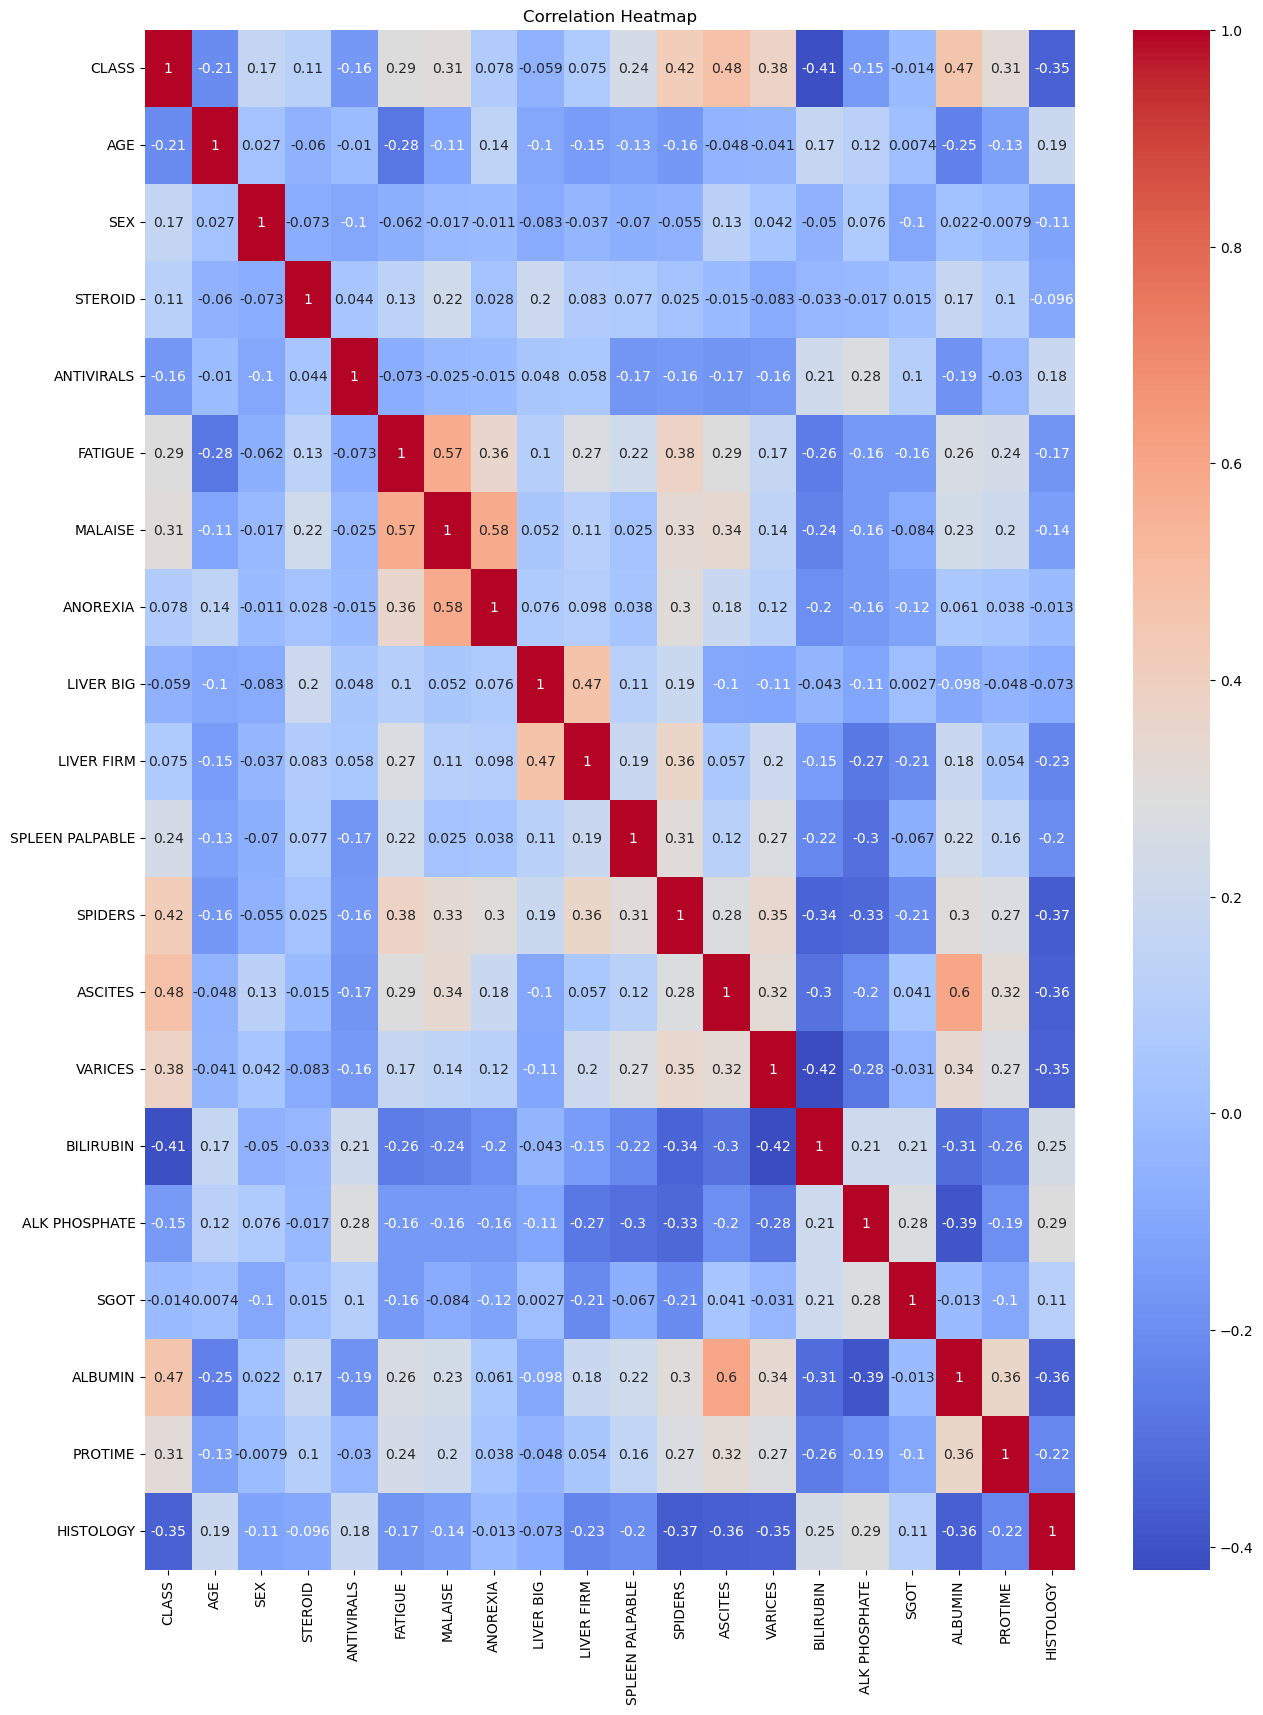

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns
# Compute correlations between features and target
correlations = df.corr()['CLASS'].drop('CLASS')

# Print correlations
print("Correlation with the Target:")
print(correlations)
print()

# Plot correlation heatmap
plt.figure(figsize=(15, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Transformation

In [15]:
x=df.drop(['CLASS'],axis=1)
y=df['CLASS']

In [16]:
df

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.000000,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,61.852273,1
1,2,50,1,1.000000,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,61.852273,1
2,2,78,1,2.000000,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,61.852273,1
3,2,31,1,1.506494,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1
4,2,34,1,2.000000,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.325397,200.0,4.0,61.852273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,2,36,1,2.000000,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.6,120.000000,30.0,4.0,61.852273,2
151,2,44,1,2.000000,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.000000,142.0,4.3,61.852273,2
152,2,61,1,1.000000,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.000000,20.0,4.1,61.852273,2
153,2,53,2,1.000000,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.000000,19.0,4.1,48.000000,2


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [18]:
scaler=StandardScaler();
x_train=scaler.fit_transform(x_train);
x_test=scaler.transform(x_test)

## LogisticRegression

In [19]:
regressor=LogisticRegression()

In [20]:
regressor.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pread=regressor.predict(x_test)

In [22]:
print(classification_report(y_test,y_pread))

              precision    recall  f1-score   support

           1       0.62      1.00      0.77         5
           2       1.00      0.92      0.96        39

    accuracy                           0.93        44
   macro avg       0.81      0.96      0.86        44
weighted avg       0.96      0.93      0.94        44



In [27]:
print(accuracy_score(y_test,y_pread))

0.9318181818181818


In [33]:
# print(confusion_matrix(y_test,y_pread))
tn,fp,fn,tp = confusion_matrix(y_test,y_pread).ravel()

In [34]:
print(tn,fp,fn,tp)

5 0 3 36


In [36]:
a=accuracy_score(y_test,y_pread)
# accuracy =  (TP + TN) / (TP + TN + FP + FN)
a

0.9318181818181818

In [37]:
e=1-a
e

0.06818181818181823

In [43]:
precision_score(y_test, y_pread)
# precision = TP / (TP + FP)

0.625

In [44]:
recall_score(y_test, y_pread)
# recall = TP / (TP + FN)

1.0

In [45]:
# f1_Score = 2 * (precision * recall) / (precision + recall)
f1_score(y_test,y_pread)

0.7692307692307693

## NaiveBayes 

In [50]:
n_model=GaussianNB();


In [51]:
n_model.fit(x_train,y_train);
y_pred=n_model.predict(x_test)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.20      1.00      0.33         5
           2       1.00      0.49      0.66        39

    accuracy                           0.55        44
   macro avg       0.60      0.74      0.49        44
weighted avg       0.91      0.55      0.62        44



In [53]:
# print(confusion_matrix(y_test,y_pread))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()

In [54]:
print(tn,fp,fn,tp)

5 0 20 19


In [55]:
a=accuracy_score(y_test,y_pred)
# accuracy =  (TP + TN) / (TP + TN + FP + FN)
a

0.5454545454545454

In [56]:
precision_score(y_test, y_pred)
# precision = TP / (TP + FP)

0.2

In [58]:
recall_score(y_test, y_pred)
# recall = TP / (TP + FN)

1.0

In [59]:
# f1_Score = 2 * (precision * recall) / (precision + recall)
f1_score(y_test,y_pred)

0.3333333333333333

In [ ]:
# le = LabelEncoder()
# for col in king:
#     if df[col].dtype == 'object':  # Check if the column is of object type (categorical)
#         df[col] = le.fit_transform(df[col])